### Regression: 
Regression belongs to the class of Supervised Learning model where the datasets that are used for predictive/statistical modeling contain continuous labels. (A continuous variable is a variable that has an infinite number of possible values)

### Linear Regression:
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range.
- Simple Linear Regression
- Multiple Linear Regression
- Polynoial Linear Regression

### Simple Linear Regression: 
These methods are used to predict the value of a target (dependent) variable from one or more features (independent) variables, where the variables are numeric."

Simple Linear Regression is linear and continuous regression model.


Here ultimate goal is, given a training set, to learn a function h:X→Y so that h(X) is a "good" predictor for the corresponding value of Y. The domain of values that both X and Y accept are set of all real numbers.
<img src= '5.1 Image a.png' width=200 height=200>
Here, to predict accurately we have only m,b parameters to tune/adjust.

- Our algorithm will try to learn the correct values for Weight and Bias. By the end of our training, our equation will approximate the line of best fit.
- One prominent method seems to be to make y (actual value) close to mx(i)+b (predicted value), at least for the training examples you have.
- For understanding let's try defining a function that determines, for each value of the m,b, how close the y's are to the corresponding (mx(i)+b)’s. The function should look like the following:
<img src= '5.1 Image b.jpg' width=300 height=300>

    - Known as Cost function of simple linear regression
    - y - actual value of an observation
    - mx(i)+b - predicted value
    - n is the total number of observations
    - m - weight/coefficients weights is the coefficient for independent variable.
    - b - bias/intercepts bias is the intercept where our line intercepts the y-axis. Bias offsets all predictions that we make.
- MSE(Mean Sq. Error)(L2) measures the average squared difference between an observation’s actual and predicted values. 
  - The output is a single number representing the cost, or score, associated with our current set of weights.
  - Our goal is to minimize MSE to improve the accuracy of our model.
  - To minimize MSE we use Gradient Descent to calculate the gradient of our cost function.
  -  There are two parameters (coefficients) in our cost function we can control: weight m and bias b.
  - Since we need to consider the impact each one has on the final prediction, we use partial derivatives.

### Summary:
Simple Linear Regression (SLR) is a statistical method that examines the linear relationship between two continuous variables, X and Y.
   - X is regarded as the independent variable while Y is regarded as the dependent variable. 
   - SLR discovers the best fitting line using Ordinary Least Squares (OLS) criterion.
   - OLS criterion minimizes the sum of squared prediction error. 
   - Prediction error is defined as the difference between actual value y and predicted value mx(i)+b of dependent variable.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset= pd.read_csv('5.1Salary Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.shape

(30, 2)

it gives the shape the  data like row * column

In [4]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [24]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
x= dataset.iloc[:, :-1].values
y= dataset.iloc[:, -1].values

iloc=:=start to end row,

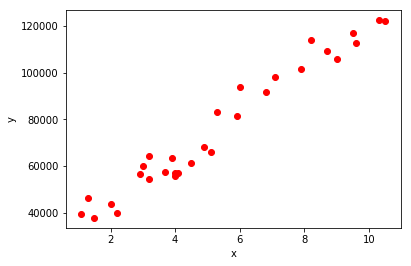

In [6]:
plt.scatter(x,y,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Since x & y are varying linearly hence we can apply linear regression to our model.

In [7]:
## Splitting the dataset into train and train
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= .20, random_state= 0)

In [8]:
## Fitting Simple linear Regression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
regressor.coef_  # return slope

array([9312.57512673])

In [30]:
regressor.intercept_  # return intercept

26780.099150628186

In [10]:
## Predicting the test set result manually
coef= regressor.coef_.reshape(1,-1).T
np.dot(x_test,coef)+regressor.intercept_

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

In [14]:
## Predicting the test set result using predict() method
y_pred= regressor.predict(x_test)

In [15]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [16]:
## Making prediction for unseen data eg. for 2.6 year of experience
regressor.predict([[2.6]])

array([50992.79448012])

**Coefficient of determination:** Regression score function
<img src='5.1 Image c.png' width= 300 height=100>
The R^2(or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values.

In [17]:
## Evaluating the predicted result w.r.t original result
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.988169515729126

In [18]:
print(regressor.score(x_test, y_test))
regressor.score(x_train, y_train)

0.988169515729126


0.9411949620562126

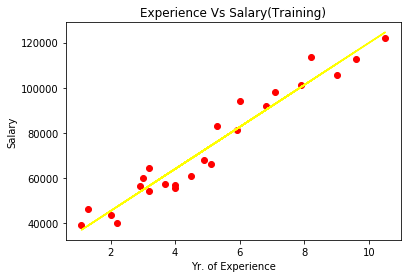

In [37]:
# Visualizing the Training set
plt.scatter(x_train,y_train,color='red') #training data
plt.plot(x_train, regressor.predict(x_train),color='yellow')
plt.title('Experience Vs Salary(Training)')
plt.xlabel('Yr. of Experience')
plt.ylabel('Salary')
plt.show()

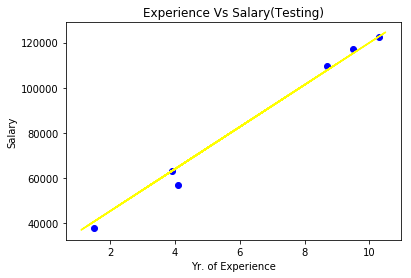

In [20]:
plt.scatter(x_test,y_test,color='blue') #testing data
plt.plot(x_train, regressor.predict(x_train),color='yellow')
plt.title('Experience Vs Salary(Testing)')
plt.xlabel('Yr. of Experience')
plt.ylabel('Salary')
plt.show()